In [3]:
! pip install pathlib

  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14362 sha256=f3cf1d01f4e4e83b74a99dea2506dbae26ce9f1806c0e0f5466fe72ac9cf63a5
  Stored in directory: c:\users\ngkha\appdata\local\pip\cache\wheels\59\02\2f\ff4a3e16a518feb111ae1405908094483ef56fec0dfa39e571
Successfully built pathlib


In [4]:
! pip install lazypredict

In [5]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp')
df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,AUTOGEN_20210718194557722,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.12
1,AUTOGEN_smiles_1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.00
2,AUTOGEN_smiles_2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.30
3,AUTOGEN_20210718215459405,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.52
4,AUTOGEN_smiles_5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,AUTOGEN_smiles_5039,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.00
5041,AUTOGEN_smiles_5040,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.81
5042,AUTOGEN_smiles_5041,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.17
5043,AUTOGEN_smiles_5042,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nan


In [50]:
X = df.drop(['Name', 'pIC50'], axis = 1)
Y = df.pIC50

In [51]:
X = X.fillna(X.mean())

In [52]:
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5041,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5042,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5043,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
5040   5.00
5041   4.81
5042   4.17
5043    nan
5044    nan
Name: pIC50, Length: 5045, dtype: float64

In [59]:
Y = Y.fillna(Y.mean())
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
5040   5.00
5041   4.81
5042   4.17
5043   5.86
5044   5.86
Name: pIC50, Length: 5045, dtype: float64

In [60]:
X.shape

(5045, 881)

In [61]:
Y.shape

(5045,)

In [62]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(5045, 140)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [64]:
print(X_train.size)
print(X_test.size)
print(Y_train.size)
print(Y_test.size)

565040
141260
4036
1009


In [65]:
#Define and build the regressors
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:52<00:00,  1.24s/it]


In [67]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.36,0.45,1.26,0.46
HistGradientBoostingRegressor,0.36,0.45,1.26,3.77
RandomForestRegressor,0.33,0.42,1.29,4.64
XGBRegressor,0.32,0.41,1.31,1.99
MLPRegressor,0.29,0.39,1.33,8.11
BaggingRegressor,0.28,0.38,1.34,0.60
SVR,0.27,0.37,1.35,3.06
NuSVR,0.27,0.37,1.35,2.35
GradientBoostingRegressor,0.25,0.35,1.37,1.88


In [68]:
predictions


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.36,0.45,1.26,0.46
HistGradientBoostingRegressor,0.36,0.45,1.26,3.77
RandomForestRegressor,0.33,0.42,1.29,4.64
XGBRegressor,0.32,0.41,1.31,1.99
MLPRegressor,0.29,0.39,1.33,8.11
BaggingRegressor,0.28,0.38,1.34,0.60
SVR,0.27,0.37,1.35,3.06
NuSVR,0.27,0.37,1.35,2.35
GradientBoostingRegressor,0.25,0.35,1.37,1.88


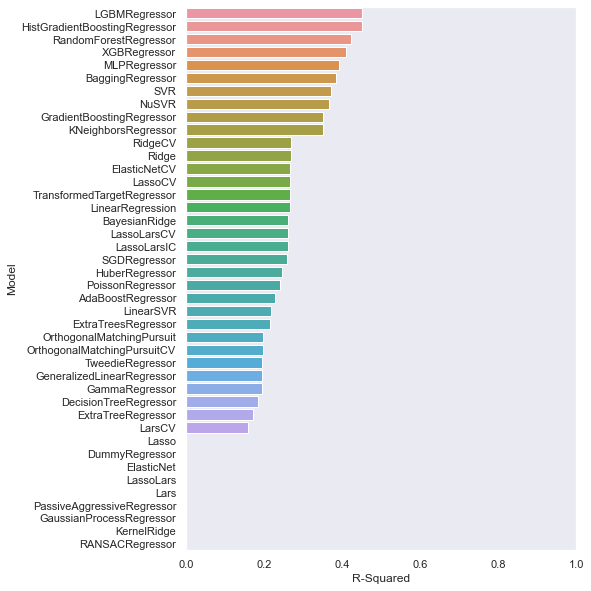

In [79]:
#Visualizing and comparing regression models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
sns.set_theme(style='dark')
ax = sns.barplot(y=models.index, x='R-Squared', data = models)
ax.set(xlim=(0,1))

plt.savefig('train_data_rsquare_comparision.pdf')

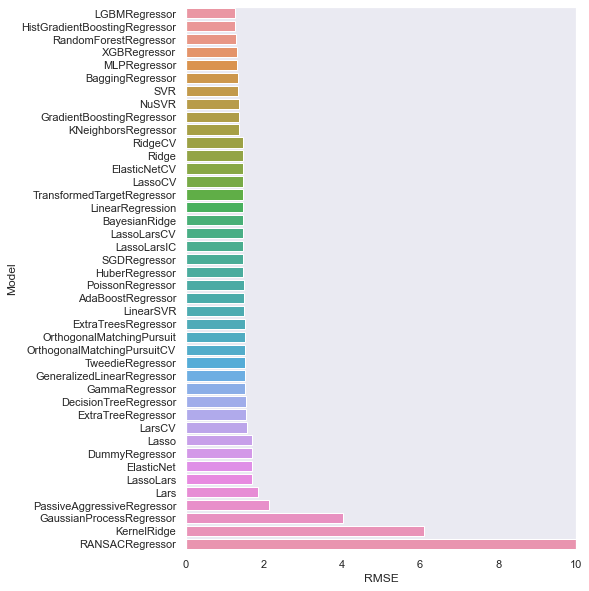

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
sns.set_theme(style='dark')
ax = sns.barplot(y=models.index, x='RMSE', data = models)
ax.set(xlim=(0,10))

plt.savefig('train_data_RMSE_comparision.pdf')

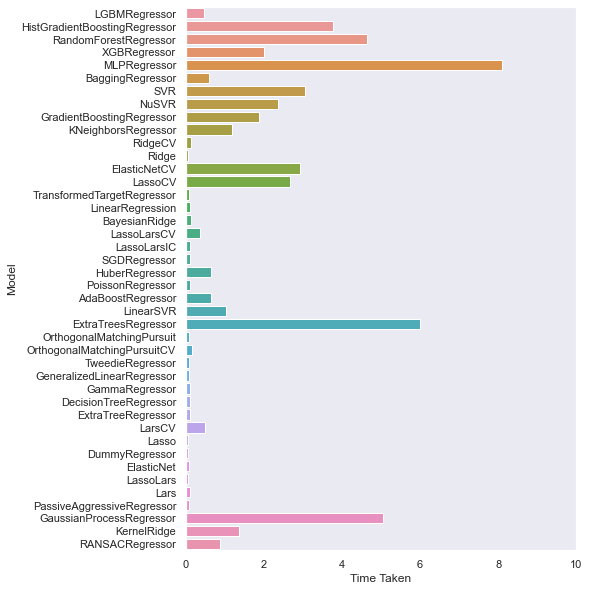

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
sns.set_theme(style='dark')
ax = sns.barplot(y=models.index, x='Time Taken', data = models)
ax.set(xlim=(0,10))

plt.savefig('train_data_time_comparision.pdf')